<a href="https://colab.research.google.com/github/spyx-03/retail-sales-statistics-analysis/blob/main/StatisticsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   day    footfall  discount_percent  sales_amount weekday
0    1  199.868566                35  24956.606022     Fri
1    2  174.469428                 9  27821.835290     Wed
2    3  205.907542                36  32858.743794     Wed
3    4  240.921194                 8  14911.629677     Thu
4    5  170.633865                23  24139.620854     Mon

--- Descriptive Statistics ---
Mean Sales: 24556.802989725464
Median Sales: 24327.37988212377
Mode Sales: [ 5813.31608878  6384.54050065  7480.68334836  7802.77060196
  8411.95013361  8726.96236983  8754.83838215  9020.38256971
  9387.69064662  9543.25413828  9655.08960631  9810.85619071
 10451.36341557 11603.55693812 12085.66331793 12608.29768161
 12725.71408625 12728.25067143 13311.54579552 13574.473444
 13592.84909817 13722.96073031 13938.2364428  14329.96626781
 14480.64487659 14911.62967653 14959.44522989 14961.37791537
 15108.82958261 15609.8838954  15714.22688723 15765.98468359
 15832.45496992 15980.8683417  16309.49138336 16315.5

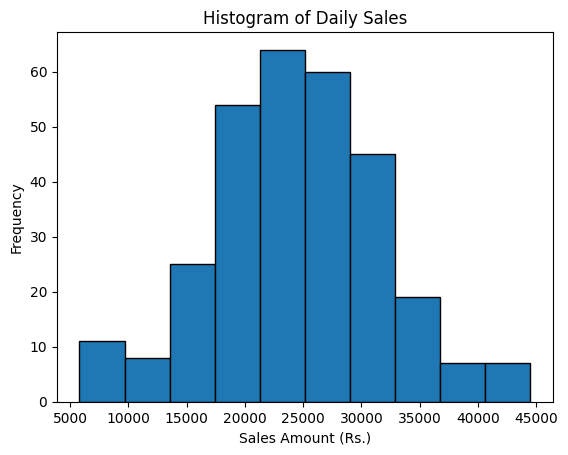

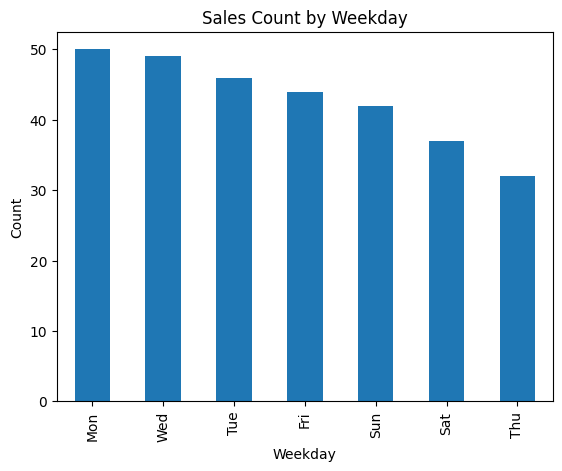

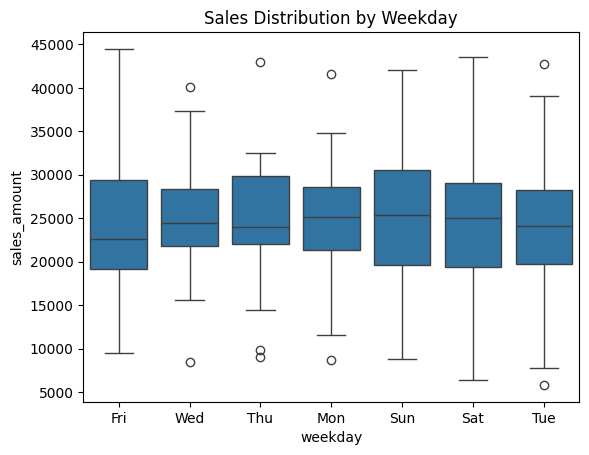


--- Correlation Analysis ---
Pearson (Discount vs Sales): 0.04700963082436782
Spearman (Footfall vs Sales): 0.03109945666062956


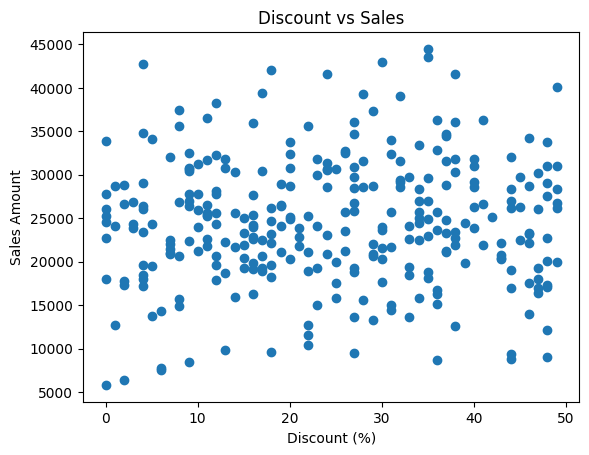

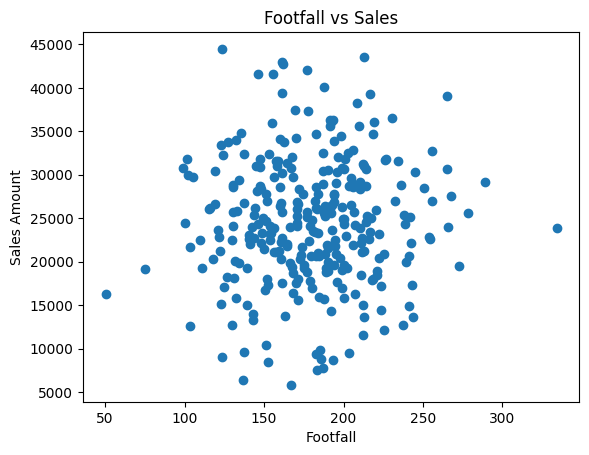


--- Linear Regression ---
Regression Equation: Sales = 23967.06 + 24.07 × Discount
Predicted Sales at 30% Discount: 24689.095625320726

P(Sales > 40,000): 0.02666666666666667
Binomial P(5 high-sales days in 10): 2.9686034359954375e-06
Poisson P(4 days when avg = 3): 0.16803135574154085
P(Sales > 35,000 using Normal Distribution): 0.0763620161744516


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


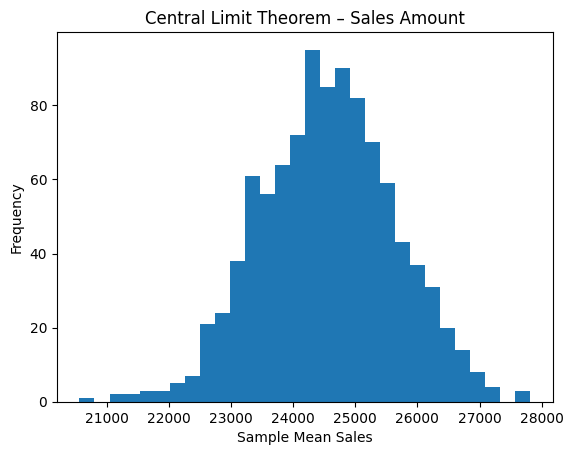

Standard Error of Mean Sales: 421.6423520732351


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom, poisson, norm
from sklearn.linear_model import LinearRegression

# =========================================================
# CREATE SYNTHETIC RETAIL SALES DATASET
# =========================================================
np.random.seed(42)
n = 300   # number of days

df = pd.DataFrame({
    "day": range(1, n+1),
    "footfall": np.random.normal(180, 40, n).clip(50),
    "discount_percent": np.random.randint(0, 50, n),
    "sales_amount": np.random.normal(25000, 7000, n).clip(5000),
    "weekday": np.random.choice(
        ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], n
    )
})

print(df.head())

# =========================================================
# DESCRIPTIVE STATISTICS
# =========================================================
print("\n--- Descriptive Statistics ---")
print("Mean Sales:", df['sales_amount'].mean())
print("Median Sales:", df['sales_amount'].median())
print("Mode Sales:", df['sales_amount'].mode().values)

range_sales = df['sales_amount'].max() - df['sales_amount'].min()
variance_sales = df['sales_amount'].var()
std_sales = df['sales_amount'].std()

print("Range:", range_sales)
print("Variance:", variance_sales)
print("Standard Deviation:", std_sales)

Q1 = df['sales_amount'].quantile(0.25)
Q3 = df['sales_amount'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR):", IQR)

CV = (std_sales / df['sales_amount'].mean()) * 100
print("Coefficient of Variation:", CV, "%")

# =========================================================
# DATA VISUALIZATION
# =========================================================

# Histogram
plt.hist(df['sales_amount'], bins=10, edgecolor='black')
plt.title("Histogram of Daily Sales")
plt.xlabel("Sales Amount (Rs.)")
plt.ylabel("Frequency")
plt.show()

# Bar chart - weekday count
df['weekday'].value_counts().plot(kind='bar')
plt.title("Sales Count by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

# Boxplot
sns.boxplot(x='weekday', y='sales_amount', data=df)
plt.title("Sales Distribution by Weekday")
plt.show()

# =========================================================
# CORRELATION ANALYSIS
# =========================================================
pearson_corr = df['discount_percent'].corr(df['sales_amount'])
spearman_corr = df['footfall'].corr(df['sales_amount'], method='spearman')

print("\n--- Correlation Analysis ---")
print("Pearson (Discount vs Sales):", pearson_corr)
print("Spearman (Footfall vs Sales):", spearman_corr)

# Scatter plots
plt.scatter(df['discount_percent'], df['sales_amount'])
plt.xlabel("Discount (%)")
plt.ylabel("Sales Amount")
plt.title("Discount vs Sales")
plt.show()

plt.scatter(df['footfall'], df['sales_amount'])
plt.xlabel("Footfall")
plt.ylabel("Sales Amount")
plt.title("Footfall vs Sales")
plt.show()

# =========================================================
# SIMPLE LINEAR REGRESSION
# =========================================================
X = df[['discount_percent']]
Y = df['sales_amount']

model = LinearRegression()
model.fit(X, Y)

print("\n--- Linear Regression ---")
print(f"Regression Equation: Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Discount")

predicted_sales = model.predict([[30]])
print("Predicted Sales at 30% Discount:", predicted_sales[0])

# =========================================================
# PROBABILITY ANALYSIS
# =========================================================

# Probability of high sales day (> 40,000)
prob_high_sales = np.mean(df['sales_amount'] > 40000)
print("\nP(Sales > 40,000):", prob_high_sales)

# Binomial probability
binom_prob = binom.pmf(5, 10, prob_high_sales)
print("Binomial P(5 high-sales days in 10):", binom_prob)

# Poisson probability
poisson_prob = poisson.pmf(4, 3)
print("Poisson P(4 days when avg = 3):", poisson_prob)

# =========================================================
# NORMAL DISTRIBUTION
# =========================================================
mean_sales = df['sales_amount'].mean()
std_sales = df['sales_amount'].std()

prob_sales_gt = 1 - norm.cdf(35000, mean_sales, std_sales)
print("P(Sales > 35,000 using Normal Distribution):", prob_sales_gt)

# =========================================================
# SAMPLING & CENTRAL LIMIT THEOREM
# =========================================================

# Simple random sample
sample_50 = df.sample(50)

# CLT demonstration
sample_means = [df.sample(40)['sales_amount'].mean() for _ in range(1000)]

plt.hist(sample_means, bins=30)
plt.title("Central Limit Theorem – Sales Amount")
plt.xlabel("Sample Mean Sales")
plt.ylabel("Frequency")
plt.show()

# Standard Error of Mean
SEM = std_sales / np.sqrt(len(df))
print("Standard Error of Mean Sales:", SEM)